In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Dataset haqida ba'zi ma'lumotlarni chiqarib olamiz

In [3]:
diabetes_df = pd.read_csv('diabetes_clean.csv')
diabetes_df.shape

(768, 9)

In [4]:
diabetes_df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
diabetes_df.describe()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


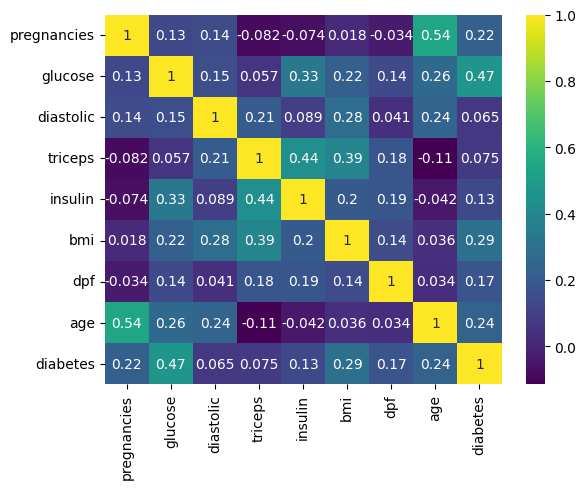

In [6]:
sns.heatmap(diabetes_df.corr(), annot = True, cmap = 'viridis')
plt.show()

### Glucose va glucosedan boshqa barcha ustunlarning predictionini ko'rib olamiz

In [7]:
X = diabetes_df.drop('glucose', axis = 1).values
y = diabetes_df['glucose'].values
# print(type(X), type(y))

In [19]:
# display(X, y)

### Bmi ustuninining valuelarini alohida o'zgaricha olamiz

In [9]:
X_bmi = X[:, 3]
print(y.shape, X_bmi.shape)

(768,) (768,)


### Bmini scalar arraydan 2D arrayga o'zgartiramiz

In [10]:
X_bmi = X_bmi.reshape(-1, 1)
X_bmi.shape

(768, 1)

### Misol tariqasida scatterplot orqali glucose va bmining bog'liqligini chizib ko'ramiz

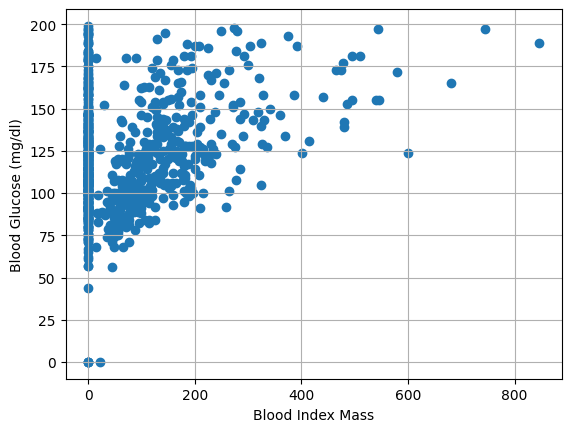

In [11]:
plt.scatter(X_bmi, y)
plt.ylabel("Blood Glucose (mg/dl)")
plt.xlabel("Blood Index Mass")
plt.grid()
plt.show()

### Bmi va glucosening predictionini chiqarib ko'ramiz

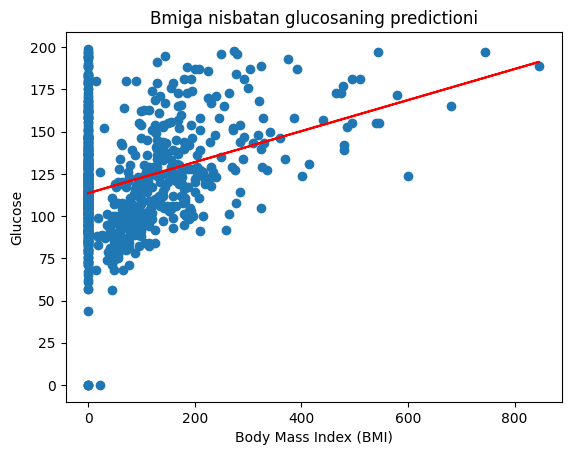

In [12]:
model = LinearRegression()
line = c = 'r' # chiziq rangi
model.fit(X_bmi, y)
predictions = model.predict(X_bmi)
plt.scatter(X_bmi, y)
plt.plot(X_bmi, predictions, line)
plt.title('Bmiga nisbatan glucosaning predictioni')
plt.ylabel('Glucose')
plt.xlabel('Body Mass Index (BMI)')
plt.show()

### Insulin bo'yicha glucosaning predictionini chiqaramiz

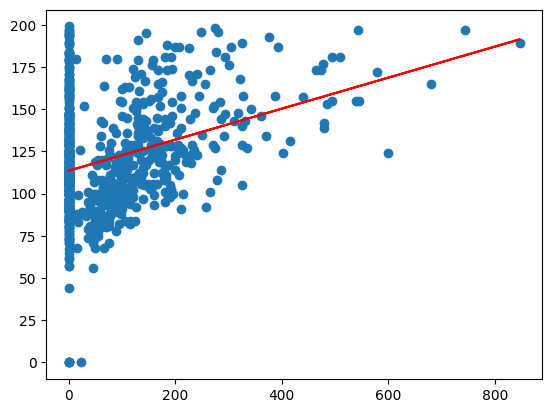

In [13]:
X = diabetes_df[["insulin"]]
y = diabetes_df[["glucose"]]

model.fit(X,y)
y_pred2 = model.predict(X)
plt.scatter(X, y)
plt.plot(X, y_pred2, line)
plt.show()

### Bminig age bo'yicha predictionini ko'ramiz

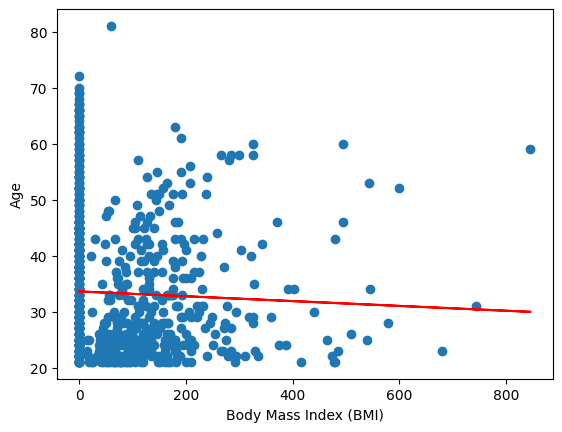

In [14]:
age = diabetes_df[['age']]

model.fit(X_bmi, age)
y_pred = model.predict(X_bmi)
plt.scatter(X_bmi, age)
plt.plot(X_bmi, y_pred, line)
plt.xlabel("Body Mass Index (BMI)")
plt.ylabel("Age")
plt.show()

### Bu ikta ustunlarning korrelatsiyasini ko'rib olamiz

In [15]:
diabetes_df['bmi'].corr(diabetes_df['age']) # korrelatsiya juda hma kichik

np.float64(0.036241870092294105)

### Correlation kattaroq bo'lgan ustunlarni predict qilamiz

In [16]:
diabetes_df.corr()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
diastolic,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
triceps,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
dpf,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


### Bmini tripcep bo'yicha prediction qilamiz (correlation = 0.39)

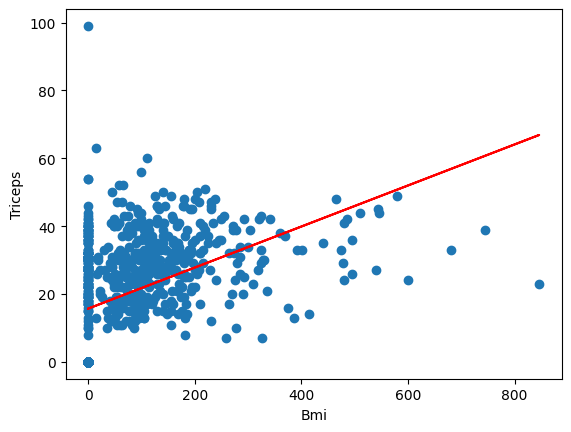

In [17]:
y = diabetes_df[['triceps']]
model.fit(X_bmi, y)
y_pred = model.predict(X_bmi)
plt.scatter(X_bmi, y)
plt.plot(X_bmi, y_pred, line)
plt.xlabel("Bmi")
plt.ylabel("Triceps")
plt.show()

### Pregnanciesni age bilan predict qilamiz

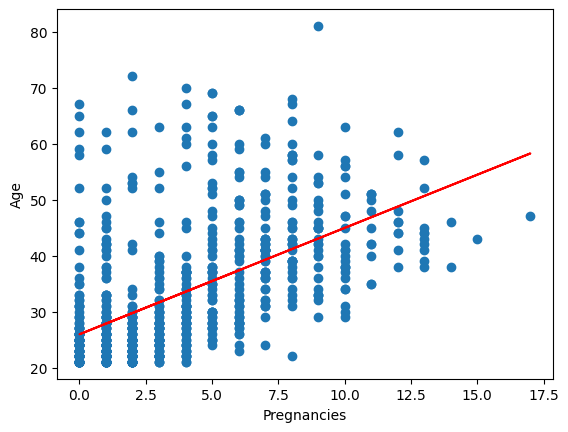

In [18]:
X = diabetes_df[['pregnancies']]
y = diabetes_df['age']

model.fit(X, y)
prediction = model.predict(X)
plt.scatter(X, y)
plt.plot(X, prediction, line)
plt.xlabel('Pregnancies')
plt.ylabel('Age')
plt.show()